In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

# iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


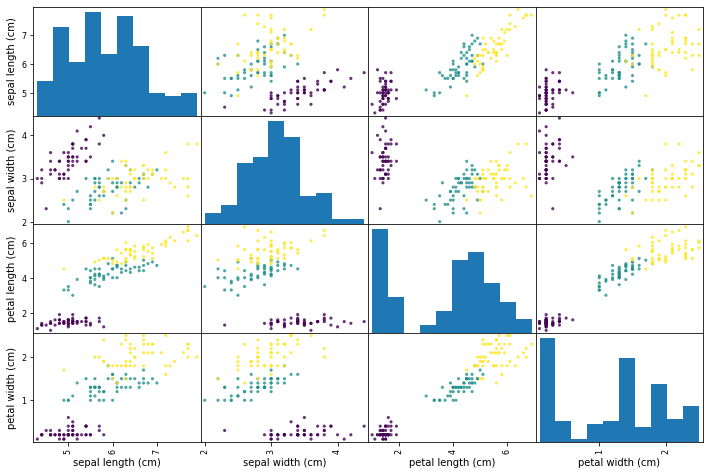

In [4]:
pd.plotting.scatter_matrix(df, c=iris['target'], marker='o', s=10, alpha=.8, figsize=(12, 8))
plt.show()

In [5]:
X = iris.data
Y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [6]:
print(target_names)

['setosa' 'versicolor' 'virginica']


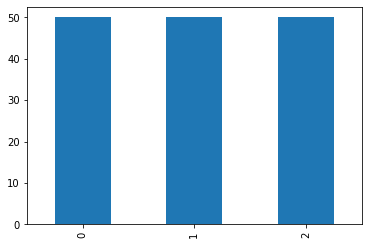

In [7]:
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

C:\Users\ourcl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


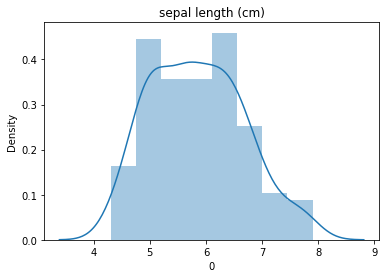

C:\Users\ourcl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


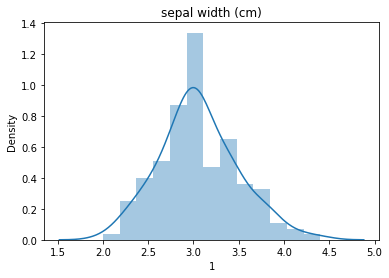

C:\Users\ourcl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


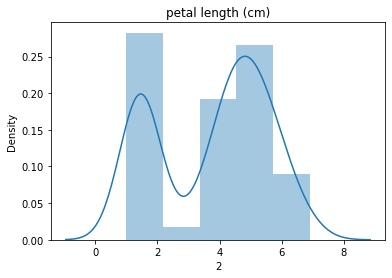

C:\Users\ourcl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


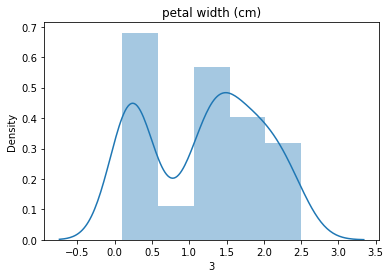

In [8]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
PC_score = pca.transform(X)

print(PC_score)
print(PC_score.shape)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

In [10]:
# pca 의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

# TODO 1

2차원 데이터가 주어졌을때 이를 scatter 하는 함수를 구현하시오.

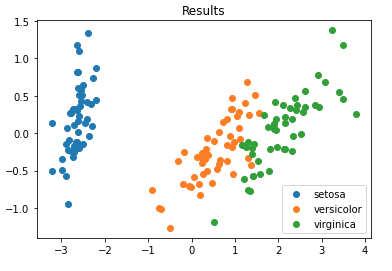

In [11]:
# 아래 그림은 정답 예시
Image("show2D_sample.png")

In [12]:
# Hint
# plt.legend(), plt.title(), plt.scatter() 함수 이용

def show2D(pca_score, Y, target_names):
    plt.figure()
    # TODO -->
    pca_score = pd.DataFrame(pca_score)
    pca_score['target'] = Y
    #print(pca_score)
    
    number = []
    for i in range(len(target_names)):
        number.append(i)
    pca_score['target'].replace(number,target_names,inplace=True)
    colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
    for target, color in zip(target_names,colors):
        IdxToKeep = pca_score['target'] == target
        plt.scatter(pca_score.loc[IdxToKeep, 0]
                    ,pca_score.loc[IdxToKeep, 1]
                    ,c = color
                    ,s= 50)
    plt.title('Results')
    plt.legend(target_names, loc='lower right')
    # <--

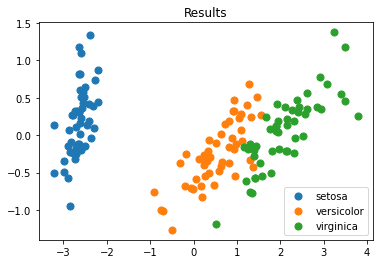

In [13]:
# Y = iris.target
# target_names = iris.target_names
# pca = PCA(n_components=2)
# pca.fit(X)
# PC_score = pca.transform(X)
# Y = iris.target
# target_names = iris.target_names

show2D(PC_score, Y, target_names)

# TODO 2

PCA 함수를 구현하시오.

## 요구사항
1. normalize 한 
2. 아래의 numpy 내장 함수 사용 가능
    - ```numpy.mean()```
    - ```numpy.linalg.eig()```
    - ```numpy.dot()```

In [14]:
def new_coordinates(X, vectors):
    for i in range(vectors.shape[0]):
        if (i == 0):
            new = [X.dot(vectors.T[i])]
        else:
            new = np.concatenate((new, [X.dot(vectors.T[i])]), axis = 0)
    return (new.T)

def student_pca(X, n_components=2):
    pca_results = None
    # TODO -->

    # Covariance Matrix
    X = X - X.mean(axis = 0)
    features = X.T
    cov_matrix = np.cov(features)

    # Eigendecomposition
    values, vectors = np.linalg.eig(cov_matrix)
    #print(vectors.shape)
    idx = values.argsort()[::-1]
    values = values[idx]
    vectors = vectors[:,idx]
    new_coordinate = new_coordinates(X,vectors)

    index = list(idx)

    for i in range(n_components):
        if i == 0:
            pca_results = [new_coordinate[:,index.index(i)]]
        else:
            pca_results = np.concatenate(([new_coordinate[:,index.index(i)]],pca_results),axis=0)

    return pca_results.T

pca_student_score = student_pca(X, n_components=2)
print(pca_student_score)
print(PC_score)

[[-0.31939725 -2.68412563]
 [ 0.17700123 -2.71414169]
 [ 0.14494943 -2.88899057]
 [ 0.31829898 -2.74534286]
 [-0.32675451 -2.72871654]
 [-0.74133045 -2.28085963]
 [ 0.08946138 -2.82053775]
 [-0.16338496 -2.62614497]
 [ 0.57831175 -2.88638273]
 [ 0.11377425 -2.6727558 ]
 [-0.6450689  -2.50694709]
 [-0.01472994 -2.61275523]
 [ 0.235112   -2.78610927]
 [ 0.51139459 -3.22380374]
 [-1.17876464 -2.64475039]
 [-1.33806233 -2.38603903]
 [-0.81067951 -2.62352788]
 [-0.31184914 -2.64829671]
 [-0.87283904 -2.19982032]
 [-0.51356031 -2.5879864 ]
 [-0.39134594 -2.31025622]
 [-0.43299606 -2.54370523]
 [-0.13346807 -3.21593942]
 [-0.09870885 -2.30273318]
 [ 0.03728186 -2.35575405]
 [ 0.14601688 -2.50666891]
 [-0.13095149 -2.46882007]
 [-0.36771886 -2.56231991]
 [-0.31203998 -2.63953472]
 [ 0.19696122 -2.63198939]
 [ 0.20431849 -2.58739848]
 [-0.41092426 -2.4099325 ]
 [-0.81336382 -2.64886233]
 [-1.09314576 -2.59873675]
 [ 0.12132235 -2.63692688]
 [-0.06936447 -2.86624165]
 [-0.59937002 -2.62523805]
 

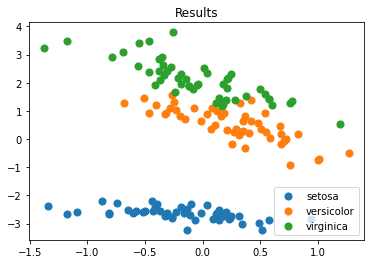

In [15]:
show2D(pca_student_score, Y, target_names)

# TODO 3

digits data 를 이용하여 PCA 결과를 확인하시오.

In [16]:
digits = datasets.load_digits()

In [17]:
# TODO -->

In [18]:
df_digits = pd.DataFrame(digits['data'], columns=digits['feature_names'])
df_digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [19]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names

pca = student_pca(X,n_components=2)

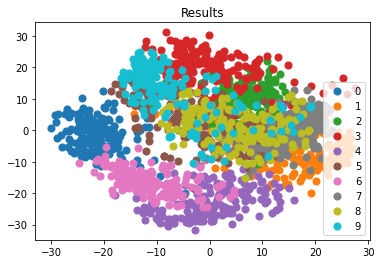

In [20]:
show2D(pca, Y, target_names)

# <--

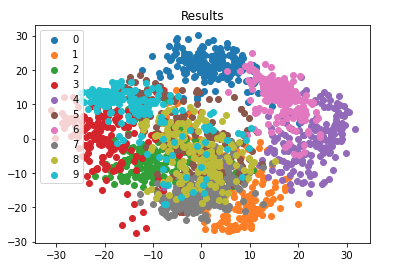

In [21]:
# 예시 정답
Image('digits_sample.png')

# TODO 4

TSNE 를 이용하여 digits 데이터의 결과를 Visualizing 하시오.

In [22]:
from sklearn.manifold import TSNE



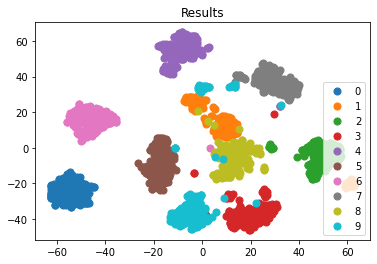

In [23]:
tsen = TSNE(n_components=2)
digits_tsne = tsen.fit_transform(digits.data)

# def show2D(pca_score, Y, target_names):
show2D(digits_tsne, Y, target_names)

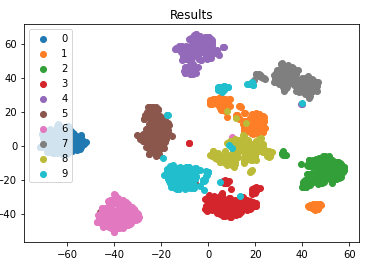

In [24]:
# 예시 정답
Image('tsne_sample.png')

# 과제 : PCA Reconstruction# 과제 : PCA reconstruction

Digits 데이터를 2차원, 3차원, 4차원, 32차원으로 PCA 한 결과를 reconstruction 했을 때 원래 데이터와의 MSE(Mean Square Error) 을 확인 및 복원데이터를 시각화하고 오차율이 다른 이유를 분석하여 보고서를 제출하시오. (코드, 분석내용 첨부)

- 제출형식: {분반}_{학번}_{이름}.zip (ex: 1_20210928_홍길동.zip)
- 제출파일: 보고서({분반}_{학번}_{이름}.pdf), 주피터노트북 파일({분반}_{학번}_{이름}.ipynb)
- 제출기한: 일주일 (사이버캠퍼스 참고)

In [25]:
digits = datasets.load_digits()

In [26]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names
n_samples = X.shape[0]
images = X.reshape((n_samples, -1))

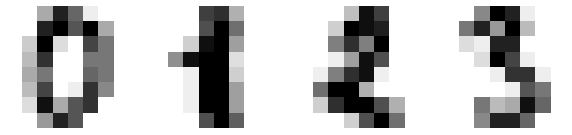

In [27]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

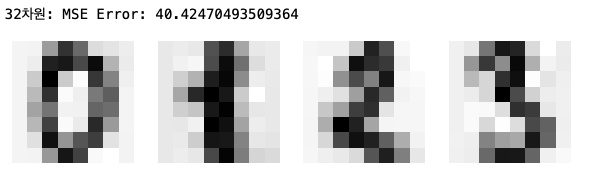

In [28]:
# 예시
Image('assignment_sample.png')

2 dimension MSE : 5.015891669676524
3 dimension MSE : 5.019727387227253
4 dimension MSE : 5.010818533646235
32 dimension MSE : 4.925979211739596


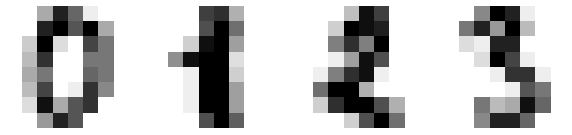

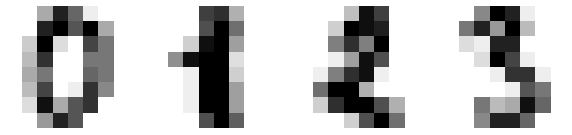

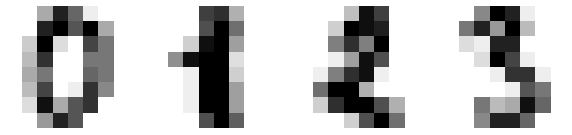

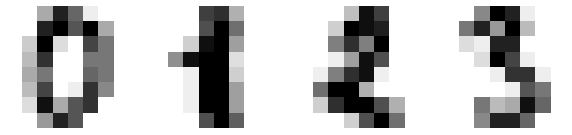

In [37]:
# TODO --> 
def show2D_digits(images):
	n_samples = X.shape[0]
	images = X.reshape((n_samples, -1))
	_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
	for ax, image in zip(axes, images):
			ax.set_axis_off()
			image = image.reshape(8, 8)
			ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

def student_vec(X, n_components=2):
    ans = None
    # TODO -->

    # Covariance Matrix
    X = X - X.mean(axis = 0)
    features = X.T
    cov_matrix = np.cov(features)

    # Eigendecomposition
    values, vectors = np.linalg.eig(cov_matrix)
    #print(vectors.shape)
    idx = values.argsort()[::-1]
    # values = values[idx]
    # vectors = vectors[:,idx]
    idx = list(idx)

    for i in range(n_components):
        if i == 0:
            ans = [vectors[:,idx.index(i)]]
        else:
            ans = np.concatenate(([vectors[:,idx.index(i)]],ans),axis=0)
    return (ans)

# def stu_mse(true, recv):
#     return (np.square(np.subtract(true,recv)).mean())

# def stu_mse(true, recv):
#     return (1/len(true)) * (np.sum((true-recv)**2))

from sklearn.metrics import mean_absolute_error
images = images.reshape(1,-1)
X_mean = X.mean()

# 2 dim #
stu_pca = student_pca(X, 2)
vec = student_vec(X,2)
re_stu_pca = stu_pca.dot(vec)
show2D_digits(re_stu_pca)

### 2 dim MSE ###
re_stu_pca = re_stu_pca.reshape(1,-1)
#MSE = stu_mse(images,re_stu_pca)
MSE = mean_absolute_error(images, re_stu_pca)
print("{} dimension MSE : {}".format(2,MSE))


# 3 dim #
stu_pca = student_pca(X, 3)
vec = student_vec(X,3)
re_stu_pca = stu_pca.dot(vec)
show2D_digits(re_stu_pca)

### 3 dim MSE ###
re_stu_pca = re_stu_pca.reshape(1,-1)
#MSE = stu_mse(images,re_stu_pca)
MSE = mean_absolute_error(images, re_stu_pca)
print("{} dimension MSE : {}".format(3,MSE))


# 4 dim #
stu_pca = student_pca(X, 4)
vec = student_vec(X,4)
re_stu_pca = stu_pca.dot(vec)
show2D_digits(re_stu_pca)

### 4 dim MSE ###
re_stu_pca = re_stu_pca.reshape(1,-1)
#MSE = stu_mse(images,re_stu_pca)
MSE = mean_absolute_error(images, re_stu_pca)
print("{} dimension MSE : {}".format(4,MSE))


# 32 dim #
stu_pca = student_pca(X, 32)
vec = student_vec(X,32)
re_stu_pca = stu_pca.dot(vec)
show2D_digits(re_stu_pca)

### 3 dim MSE ###
re_stu_pca = re_stu_pca.reshape(1,-1)
#MSE = stu_mse(images,re_stu_pca)
MSE = mean_absolute_error(images, re_stu_pca)
print("{} dimension MSE : {}".format(32,MSE))